#0 BIBLIOTECAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy as sp
import patsy as pt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV


#1 CARREGAR OS DADOS

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [ ]:
#Nome das colunas foi adquirido do arquivo auto-mp.names
##https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names
names =['mpg','cyl','dsip','hp','weight','aco','year','origin','name']

In [ ]:
df = pd.read_table(url, header=None, delim_whitespace= True, names=names)

In [ ]:
df.head()

,mpg,cyl,dsip,hp,weight,aco,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#2 EDA

In [ ]:
#Vemos que origin é variável categórica.
#Podemos categorizar nossos dados por ano também.
df.describe()

,mpg,cyl,dsip,weight,aco,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


##Separando Variáveis

In [ ]:

#Podemos considerar as variáveis abaixo como categóricas
df['year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [ ]:
#Converte o tipo das variáveis para categórica
df['year'] = df['year'].astype('category')
df['origin'] = df['origin'].astype('category')

#Seleciona somente variáveis categóricas
xCat = df.select_dtypes(include='category')

In [ ]:
xCat.head()

,year,origin
0,70,1
1,70,1
2,70,1
3,70,1
4,70,1


In [ ]:
xNum = df.select_dtypes(include='number')
xNum.drop(columns=['mpg'],inplace=True)
xNum.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,cyl,dsip,weight,aco
0,8,307.0,3504.0,12.0
1,8,350.0,3693.0,11.5
2,8,318.0,3436.0,11.0
3,8,304.0,3433.0,12.0
4,8,302.0,3449.0,10.5


In [ ]:
y = df['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

##Distribuição das variáveis

###Variáveis categóricas

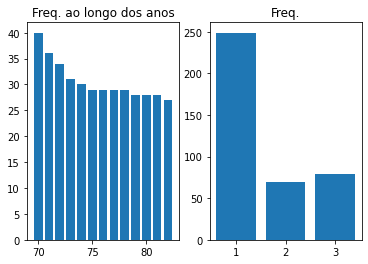

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.bar(xCat['year'].unique(),xCat['year'].value_counts())
ax1.set_title('Freq. ao longo dos anos')

ax2.bar(xCat['origin'].unique(),xCat['origin'].value_counts())
ax2.set_title('Freq.')

plt.show()

###Variáveis contínuas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

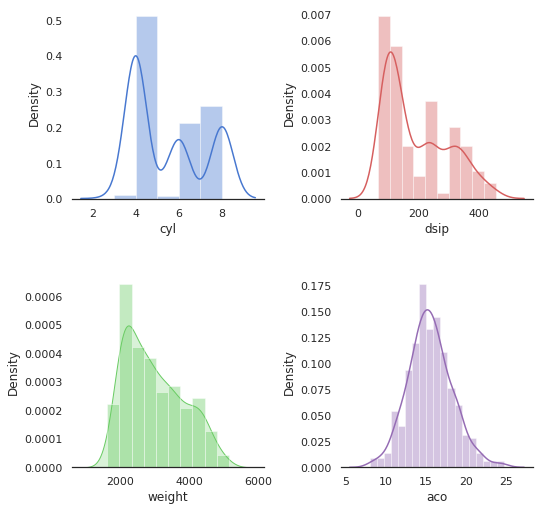

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(8, 8))
sns.despine(left=True)

sns.distplot(xNum['cyl'], hist=True, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(xNum['dsip'], hist=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(xNum['weight'], hist=True, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a histogram and kernel density estimate
sns.distplot(xNum['aco'], hist=True, color="m", ax=axes[1, 1])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb494d2910>,
      dtype=object)

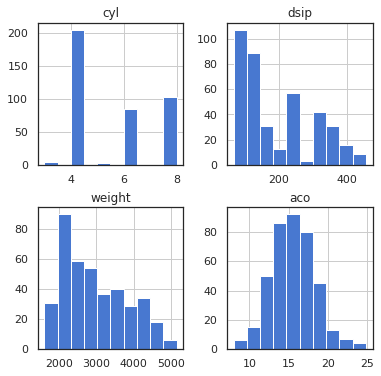

In [ ]:
xNum.hist(figsize=(6,6))

###Target

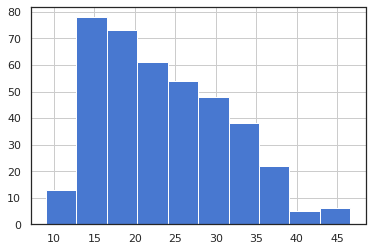

In [ ]:
y.hist()

#3 PRÉ TRATAMENTO

##Variável Resposta

In [ ]:
#Teste de normalidade. Faremos o teste de Kolmogorov-Smirnov
kStat,kPvalue = sp.stats.kstest(y, 'norm')

In [ ]:
print(f"(Estatística: {kStat} | P-valor: {kPvalue})")

(Estatística: 1.0 | P-valor: 0.0)


(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <a list of 10 Patch objects>)

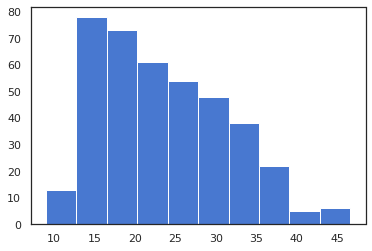

In [ ]:
plt.hist(y)

####BoxCox

In [ ]:
#O que é esse alpha? É o intervalo de confiança!
#Vamos escolher o intervalo como este valor conhecido, o objetivo é tentar
#achar o BoxCox com o expoente com o menor desvpad.

yBx = sp.stats.boxcox(y, alpha=0.001)

In [ ]:
print(f"(Melhor valor exp: {yBx[1]}| IC: {yBx[2]})")

(Melhor valor exp: 0.19735475361200427| IC: (-0.28456734764083347, 0.6830973467572937))


In [ ]:
#Vamos usar o dataset transformado pelo BoxCox para vermos os valores
kStat2,kPvalue2 = sp.stats.kstest(yBx[0], 'norm')
print(f"(Estatística: {kStat2} | P-valor: {kPvalue2})")

(Estatística: 0.9970260615656921 | P-valor: 0.0)


(array([ 3., 30., 41., 56., 54., 61., 68., 49., 27.,  9.]),
 array([2.75064111, 3.05034978, 3.35005846, 3.64976713, 3.94947581,
        4.24918448, 4.54889316, 4.84860183, 5.14831051, 5.44801918,
        5.74772786]),
 <a list of 10 Patch objects>)

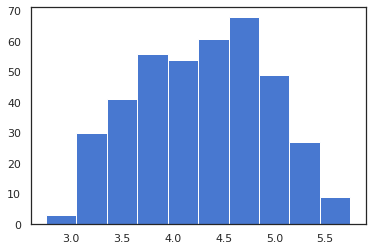

In [ ]:
plt.hist(yBx[0])

####Log

In [ ]:
ylog = np.log(y)

In [ ]:
kStat3,kPvalue3 = sp.stats.kstest(ylog, 'norm')
print(f"(Estatística: {kStat3} | P-valor: {kPvalue3})")

(Estatística: 0.9868363378442295 | P-valor: 0.0)


(array([ 3., 10., 40., 46., 66., 60., 67., 58., 39.,  9.]),
 array([2.19722458, 2.36166217, 2.52609977, 2.69053737, 2.85497496,
        3.01941256, 3.18385016, 3.34828775, 3.51272535, 3.67716294,
        3.84160054]),
 <a list of 10 Patch objects>)

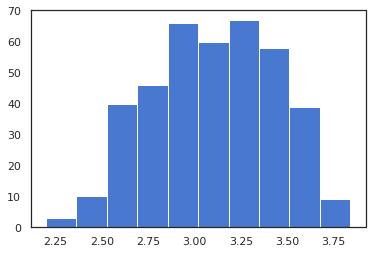

In [ ]:
plt.hist(ylog)

#### Raíz Quadrada

In [ ]:
ySqrt = np.sqrt(y)

In [ ]:
kStat4, kPvalue4 = sp.stats.kstest(ySqrt, 'norm')
print(f"(Estatística: {kStat4} | P-valor: {kPvalue4})")

(Estatística: 0.9986501019683699 | P-valor: 0.0)


(array([ 7., 45., 47., 69., 57., 65., 48., 37., 17.,  6.]),
 array([3.        , 3.38264193, 3.76528385, 4.14792578, 4.53056771,
        4.91320963, 5.29585156, 5.67849349, 6.06113541, 6.44377734,
        6.82641927]),
 <a list of 10 Patch objects>)

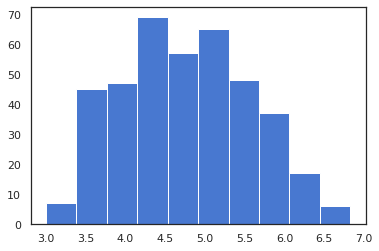

In [ ]:
plt.hist(ySqrt)

####Analisando as transformações

Considerando os dados, é melhor utilizar a transformada LOG. Ela é mais fácil de "voltar" os dados. Além disso, ela apresentou o menor valor de estatística no teste de Kolmogorov.
Vamos comparar o modelo sem transformação com o modelo com a transformação log.

Text(0, 0.5, 'Freq')

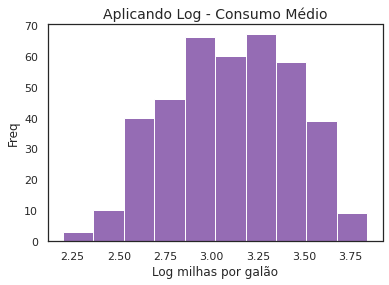

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.hist(ylog, color="m")
plt.title("Aplicando Log - Consumo Médio",size=14)
ax.set_xlabel('Log milhas por galão')
ax.set_ylabel('Freq')

In [ ]:
kStatl,kPvaluel = sp.stats.kstest(ylog, 'norm')
print(f"(Estatística: {kStatl} | P-valor: {kPvaluel})")

(Estatística: 0.9868363378442295 | P-valor: 0.0)


##Variável Contínua

In [ ]:
def escalonamento(X):
  mu = np.mean(X)
  sigma = np.std(X, ddof=1)
  xNorm = (X-mu)/sigma

  return xNorm

In [ ]:
xNorm = escalonamento(xNum)
xNorm.head()

,cyl,dsip,weight,aco
0,1.496308,1.089233,0.630077,-1.293870
1,1.496308,1.501624,0.853259,-1.475181
2,1.496308,1.194728,0.549778,-1.656492
3,1.496308,1.060461,0.546236,-1.293870
4,1.496308,1.041280,0.565130,-1.837804


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb6b7daf90>,
      dtype=object)

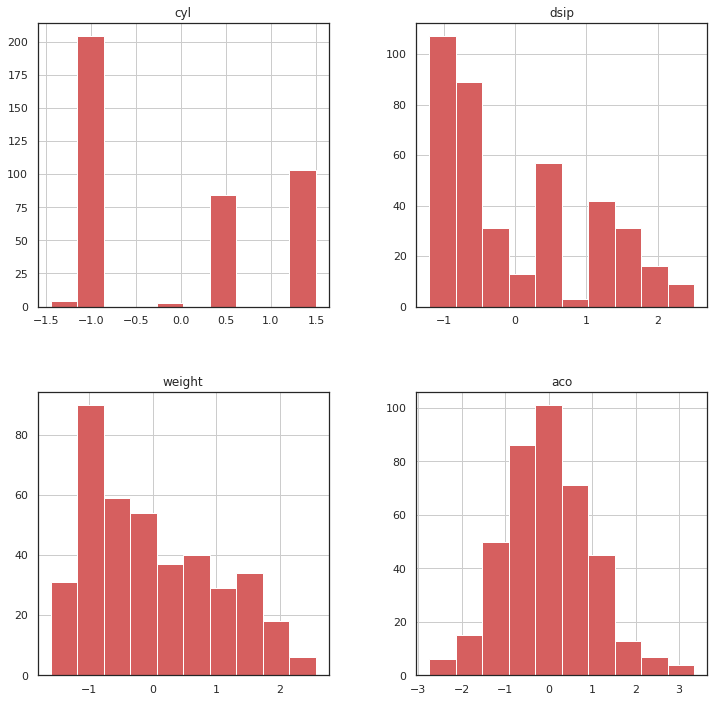

In [ ]:
xNorm.hist(figsize=(12,12),color='r')

In [ ]:
np.mean(xNorm)

cyl       3.570567e-17
dsip      1.785283e-17
weight   -1.785283e-16
aco      -2.856453e-16
dtype: float64

In [ ]:
np.std(xNorm,ddof=1)

cyl       1.0
dsip      1.0
weight    1.0
aco       1.0
dtype: float64

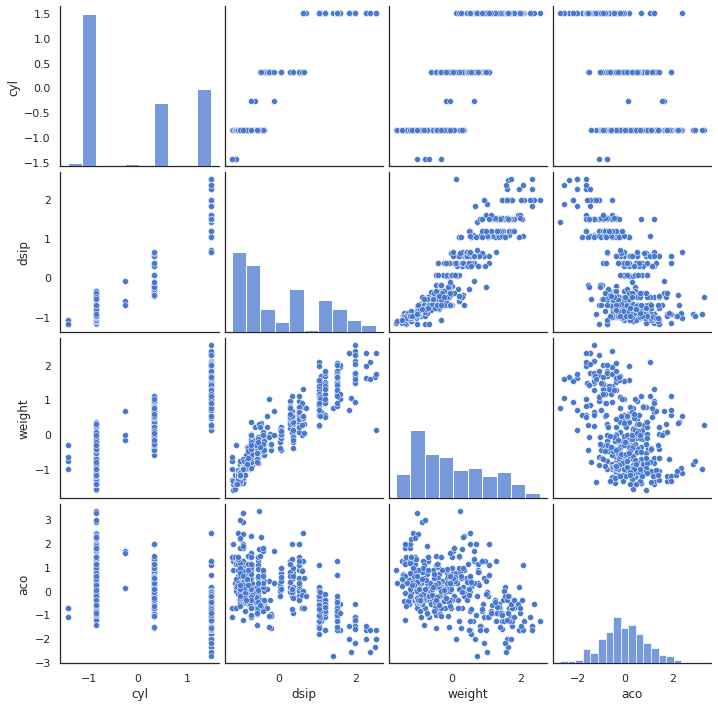

In [ ]:
#Avaliando a multicolinearidade 
sns.pairplot(xNorm)

In [ ]:
xCatD = pd.get_dummies(xCat)
xCatD.head()

,year_70,year_71,year_72,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82,origin_1,origin_2,origin_3
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#4 AJUSTE DO MODELO E SIGNIFICÂNCIA - Y NA ESCALA ORIGINAL

##4.1 Modelo com variáveis contínuas

###Overview: análise sem a divisão de treino e teste. 

In [ ]:
dfNorm = pd.concat([y.reset_index(drop=True), xNorm], axis=1)
dfNorm.head()

,mpg,cyl,dsip,weight,aco
0,18.0,1.496308,1.089233,0.630077,-1.293870
1,15.0,1.496308,1.501624,0.853259,-1.475181
2,18.0,1.496308,1.194728,0.549778,-1.656492
3,16.0,1.496308,1.060461,0.546236,-1.293870
4,17.0,1.496308,1.041280,0.565130,-1.837804


In [ ]:
def ols_formula(df, dependent_var, *exclude_cols):
  #Lista o nome das colunas no dataframe
  df_columns = list(df.columns.values)
  
  #Remove variável dependente
  df_columns.remove(dependent_var)

  #Remove as colunas "excluídas"
  for col in exclude_cols:
    df_columns.remove(col)

  return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [ ]:
ols_formula(dfNorm,'mpg')

'mpg ~ cyl + dsip + weight + aco'

In [ ]:
y,X = pt.dmatrices(ols_formula(dfNorm, 'mpg'), data=dfNorm, return_type='dataframe')

In [ ]:
X.head()

,Intercept,cyl,dsip,weight,aco
0,1.0,1.496308,1.089233,0.630077,-1.293870
1,1.0,1.496308,1.501624,0.853259,-1.475181
2,1.0,1.496308,1.194728,0.549778,-1.656492
3,1.0,1.496308,1.060461,0.546236,-1.293870
4,1.0,1.496308,1.041280,0.565130,-1.837804


In [ ]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [ ]:
regNorm = sm.OLS(y, X) #Específica o modelo
resNorm = regNorm.fit() #Ajusta o modelo
print(resNorm.summary()) #Imprime o resultado do modelo 
#Não levamos em conta a multicolinearidade. R quadrado tbm diz respeito ao treino, não ao teste 

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     230.0
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          1.58e-101
Time:                        09:05:23   Log-Likelihood:                -1142.5
No. Observations:                 398   AIC:                             2295.
Df Residuals:                     393   BIC:                             2315.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.5146      0.215    109.154      0.0

In [ ]:
#Vamos avaliar a multicolinearidade. VIF avalia o fator de inflação da variancia
#Ideal é VIF nao passar de 5. 
pd.DataFrame({'variable':X.columns[1:],
              'VIF':[variance_inflation_factor(X.values,i+1) for i in range(len(X.columns[1:]))]})

,variable,VIF
0,cyl,10.477644
1,dsip,18.281251
2,weight,8.489141
3,aco,1.557257


In [ ]:
#Vamos cortar dsip. É o quanto gastamos de diesel após frear o veículo.
y2,X2 = pt.dmatrices(ols_formula(dfNorm,'mpg','dsip'),data=dfNorm, return_type='dataframe')

In [ ]:
regNorm2 = sm.OLS(y2,X2)
resNorm2 = regNorm2.fit()
print(resNorm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     306.7
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          1.14e-102
Time:                        09:05:23   Log-Likelihood:                -1142.9
No. Observations:                 398   AIC:                             2294.
Df Residuals:                     394   BIC:                             2310.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.5146      0.215    109.203      0.0

In [ ]:
#Perceba que o valor de cyl já ta com o P-Value mais significativo.
#Sem 'dsip', todos os valores de VIF ficam perto de limites aceitáveis

####Variaveis categóricas 'dummy'

In [ ]:
dfCat = pd.concat([y.reset_index(drop=True),xCatD], axis=1)
dfCat.head()

,mpg,year_70,year_71,year_72,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82,origin_1,origin_2,origin_3
0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,15.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,18.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,16.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,17.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y,X = pt.dmatrices(ols_formula(dfCat,'mpg'),data=dfCat,return_type='dataframe')

In [ ]:
regCat = sm.OLS(y,X)
resCat = regCat.fit()
print(resCat.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     48.06
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           2.40e-75
Time:                        09:05:23   Log-Likelihood:                -1180.8
No. Observations:                 398   AIC:                             2392.
Df Residuals:                     383   BIC:                             2451.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3442      0.202     90.924      0.0

####Juntando tudo

In [ ]:
dfFinal = pd.concat([dfNorm.reset_index(drop=True),dfCat.drop(columns='mpg')],axis=1)
dfFinal.head()

,mpg,cyl,dsip,weight,aco,year_70,year_71,year_72,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82,origin_1,origin_2,origin_3
0,18.0,1.496308,1.089233,0.630077,-1.293870,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,15.0,1.496308,1.501624,0.853259,-1.475181,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,18.0,1.496308,1.194728,0.549778,-1.656492,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,16.0,1.496308,1.060461,0.546236,-1.293870,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,17.0,1.496308,1.041280,0.565130,-1.837804,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y,X = pt.dmatrices(ols_formula(dfFinal,'mpg','dsip'), data=dfFinal, return_type='dataframe')
X.tail()

,Intercept,cyl,weight,aco,year_70,year_71,year_72,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82,origin_1,origin_2,origin_3
393,1.0,-0.855244,-0.213056,0.011571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
394,1.0,-0.855244,-0.992422,3.275173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
395,1.0,-0.855244,-0.797581,-1.438919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
396,1.0,-0.855244,-0.407897,1.099439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
397,1.0,-0.855244,-0.295716,1.389537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


##Jeito certo: dividir entre treino e teste

In [ ]:
#Houve separação aleatória dos dados, então os index estão embaralhados
#Precisamos resetar

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#Reset all index
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [ ]:
regFinal = sm.OLS(y_train,X_train)
resFinal = regFinal.fit()
print(resFinal.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          7.71e-113
Time:                        09:05:23   Log-Likelihood:                -800.68
No. Observations:                 318   AIC:                             1637.
Df Residuals:                     300   BIC:                             1705.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.1490      0.156    109.686      0.0

Vemos um R-squared correspondente ao TREINO. Deveriamos remover as variáveis com o p-value grandes.


####Checando VIF 

In [ ]:
pd.DataFrame({'variable':X.columns[1:],
              'VIF':[variance_inflation_factor(X.values,i+1) for i in range(len(X.columns[1:]))]})

#Vemos um VIF menor pra cyl

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variable,VIF
0,cyl,6.474101
1,weight,5.617111
2,aco,1.449417
3,year_70,inf
4,year_71,inf
5,year_72,inf
6,year_73,inf
7,year_74,inf
8,year_75,inf
9,year_76,inf


##4.2 Avaliação de qualidade de ajuste

In [ ]:
#vamos predizer os dados de teste
y_prevendo = resFinal.predict(X_test).head()

In [ ]:
predY = pd.concat([y_test,resFinal.predict(X_test)], axis=1)
predY.columns= ['mpgReal','mpgPrev']
predY.head()

,mpgReal,mpgPrev
0,14.0,13.458026
1,25.0,23.127015
2,13.0,13.051024
3,21.0,22.078209
4,18.0,18.974951


In [ ]:
predY['mpgPrev'].unique()

array([13.45802575, 23.12701524, 13.05102443, 22.07820884, 18.97495051,
       31.10269058, 31.71565153, 23.23458847, 14.18012337, 28.48028007,
       37.77528089, 36.53195189, 19.14221525, 27.321149  , 16.57545317,
       29.51853141, 29.38669479, 29.01337372, 17.50290086, 30.60202223,
       15.14122865, 22.78349307, 25.17326196, 21.35452918, 28.1803129 ,
       29.81248226, 28.30334774, 31.09496835, 29.58875372, 17.68816861,
       19.05869773, 33.70969597, 19.17682287, 30.97400601, 24.89926404,
       23.50834001, 19.72561364, 16.71682664, 31.71635834,  7.34811447,
       10.44904674, 14.99856517, 25.01680374, 32.7760354 , 31.02119664,
       22.15576083, 20.94664156, 12.94581649, 22.00072475, 28.70973116,
       35.36071898, 27.34347429, 15.86776464, 27.56754285, 15.49287684,
       11.52072392, 20.56870954, 27.33407358, 30.24271961, 16.29135399,
       18.63642758, 22.29257173, 20.26100531, 20.03458144, 10.32259463,
       11.20243853, 10.72969855, 18.00621259, 22.19415108, 10.60

In [ ]:
print('Rquadrado:', metrics.r2_score(predY['mpgReal'], predY['mpgPrev']))
print('Raiz do erro quadrado médio:', np.sqrt(metrics.mean_squared_error(predY['mpgReal'], predY['mpgPrev'])))

Rquadrado: 0.8389953210238429
Raiz do erro quadrado médio: 3.196393951086852


In [ ]:
#Como a diferença do R²entre o teste e o treino é pequena o modelo é bom.
#Se a diferença fosse grande isso seria um indicativo de overfit

#5 ANÁLISE DE RESÍDUOS

In [ ]:
#Calculando resíduos:
predY['res'] = predY['mpgReal']-predY['mpgPrev']
predY.head()

,mpgReal,mpgPrev,res
0,14.0,13.458026,0.541974
1,25.0,23.127015,1.872985
2,13.0,13.051024,-0.051024
3,21.0,22.078209,-1.078209
4,18.0,18.974951,-0.974951


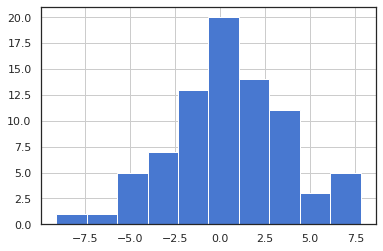

In [ ]:
#Normalidade
predY['res'].hist()


In [ ]:
#Apesar da média ser 0, essa dist. não está normal
#A estatística de teste tá bem menor que a de normalidade da resposta
#Ainda assim, com esses graus de liberdade vemos que isso nao é normal
kStat, kPvalue = sp.stats.kstest(predY['res'],'norm')
print(f"Estatística:{kStat} | P-Value:{kPvalue}")

Estatística:0.3523312367613405 | P-Value:2.1866836056334805e-09


##Homocedasticidade

Text(0, 0.5, 'Freq')

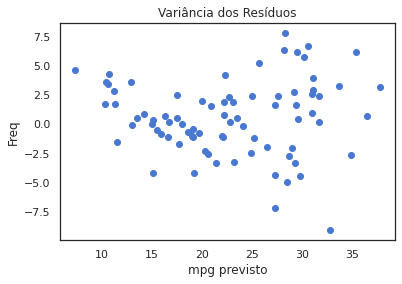

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(predY['mpgPrev'],predY['res'])
ax.set_title('Variância dos Resíduos')
ax.set_xlabel('mpg previsto')
ax.set_ylabel('Freq')


#Vemos que os resíduos possuem um comportamento de funil
#Mostra que não tem homocedasticidade, pelo fato da resp nao ter dist. normal
#Geralmente quando resposta tem dist. assimétrica, mais pontos no começo modelo 
#melhor no começo

#6 MODELO COM LN(Y)

In [ ]:
#Vamos comparar usando o log.
regLog = sm.OLS(np.log(y_train),X_train)
resFinLog = regLog.fit()
print(resFinLog.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     150.1
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          1.62e-135
Time:                        09:11:37   Log-Likelihood:                 252.96
No. Observations:                 318   AIC:                            -469.9
Df Residuals:                     300   BIC:                            -402.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2133      0.006    388.963      0.0

In [ ]:
#Alguns P-values mudam. Os anos foram mais significativos. 
#Cyl já não está tão significado
#Há um indicativo de um modelo melhor
#Talvez seria bom remover os números não significativos

In [ ]:
#Precisamos voltar os dados após previstos
predYLog = pd.concat([y_test, np.exp(resFinLog.predict(X_test))], axis=1)
predYLog.columns = ['mpgReal','mpgPrev']
predYLog.head()

,mpgReal,mpgPrev
0,14.0,13.845203
1,25.0,23.095121
2,13.0,13.504346
3,21.0,21.018789
4,18.0,18.361161


In [ ]:
predYLog['res'] = predYLog['mpgReal']-predYLog['mpgPrev']
predYLog.head()

,mpgReal,mpgPrev,res
0,14.0,13.845203,0.154797
1,25.0,23.095121,1.904879
2,13.0,13.504346,-0.504346
3,21.0,21.018789,-0.018789
4,18.0,18.361161,-0.361161


In [ ]:
print('Rquadrado:', metrics.r2_score(predYLog['mpgReal'], predYLog['mpgPrev']))
print('Raiz do erro quadrado médio:', np.sqrt(metrics.mean_squared_error(predYLog['mpgReal'], predYLog['mpgPrev'])))

Rquadrado: 0.881450195207725
Raiz do erro quadrado médio: 2.7427831519972896


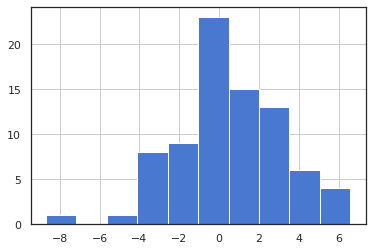

In [ ]:
predYLog['res'].hist()

In [ ]:
kStat,kPvalue = sp.stats.kstest(predYLog['res'],'norm')
print(f"KSTAT:{kStat} | PVALUE {kPvalue}")

KSTAT:0.29959630999532993 | PVALUE 7.285076784459129e-07


Text(0, 0.5, 'Res')

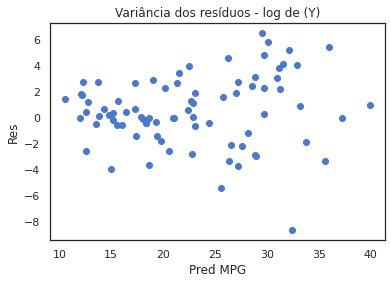

In [ ]:
#Heterocedasticidade diminuiu um pouco, mas ainda não está satisfatório
#O comportamento de funil não é agradável.
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(predYLog['mpgPrev'],predYLog['res'])
ax.set_title('Variância dos resíduos - log de (Y)')
ax.set_xlabel('Pred MPG')
ax.set_ylabel('Res')